# Collecting statistics from the temporal evolution of the tumor cell fraction

## Import libraries

In [1]:
# %matplotlib notebook
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [368]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# output_folder = "output_Experimental_Settings_R300/output_Live_dt6_NC1000_R50/"
output_folder = "output_Experimental_Settings_R300/output_Ki67_Basic_dt6_NC1000_R50/"
# output_folder = "output_Ki67_Advanced/"
# output_folder = "output_Flow_Cytometry/"
# output_folder = "output_Separated_Flow_Cytometry/"

## List output folders

In [369]:
## Type pyMCDS. and hit the tab key to see methods 

sorted(os.listdir("./"+output_folder))

['absolute_error.csv',
 'absolute_error.pdf',
 'cost.csv',
 'csse.csv',
 'csse.pdf',
 'data_fraction.csv',
 'data_fraction_std.csv',
 'data_population.csv',
 'data_population_std.csv',
 'fraction_comparison.pdf',
 'output_R00',
 'output_R01',
 'output_R02',
 'output_R03',
 'output_R04',
 'output_R05',
 'output_R06',
 'output_R07',
 'output_R08',
 'output_R09',
 'output_R10',
 'output_R11',
 'output_R12',
 'output_R13',
 'output_R14',
 'output_R15',
 'output_R16',
 'output_R17',
 'output_R18',
 'output_R19',
 'output_R20',
 'output_R21',
 'output_R22',
 'output_R23',
 'output_R24',
 'output_R25',
 'output_R26',
 'output_R27',
 'output_R28',
 'output_R29',
 'output_R30',
 'output_R31',
 'output_R32',
 'output_R33',
 'output_R34',
 'output_R35',
 'output_R36',
 'output_R37',
 'output_R38',
 'output_R39',
 'output_R40',
 'output_R41',
 'output_R42',
 'output_R43',
 'output_R44',
 'output_R45',
 'output_R46',
 'output_R47',
 'output_R48',
 'output_R49',
 'squared_error.csv',
 'stochastic_fr

## List *.xml* output files from one replicate

In [370]:
## Type pyMCDS. and hit the tab key to see methods 

file_list = []
for file in os.listdir("./"+output_folder+"output_R00/"):
    if file.endswith(".xml"):
        file_list.append(os.path.join("./"+output_folder+"output_R00/", file))
print(sorted(file_list))

['./output_Experimental_Settings_R300/output_Ki67_Basic_dt6_NC1000_R50/output_R00/PhysiCell_settings_Ki67_Basic_without_o2_apop_nec.xml', './output_Experimental_Settings_R300/output_Ki67_Basic_dt6_NC1000_R50/output_R00/final.xml', './output_Experimental_Settings_R300/output_Ki67_Basic_dt6_NC1000_R50/output_R00/initial.xml']


## Compute the number of each tumor cell phenotype over all replicates and simulation times

In [371]:
# num_replicates = 10;
# last_index = 120;

# times = np.zeros( last_index+1 ); 
# if cycle_model == 0:
#     Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
#     Ki67_positive_premitotic_count = np.zeros( (num_replicates, last_index+1) ); 
#     Ki67_positive_postmitotic_count = np.zeros( (num_replicates, last_index+1) ); 
# elif cycle_model == 1:
#     Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
#     Ki67_positive_count = np.zeros( (num_replicates, last_index+1) ); 
# elif cycle_model == 2:
#     G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
#     S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
#     G2M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
# elif cycle_model == 5:
#     live_count = np.zeros( (num_replicates, last_index+1) ); 
# elif cycle_model == 6:
#     G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
#     S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
#     G2_phase_count = np.zeros( (num_replicates, last_index+1) ); 
#     M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
# else:
#     print("Unrecognized cell cycle model.")
# apoptotic_count = np.zeros( (num_replicates, last_index+1) ); 
# necrotic_count = np.zeros( (num_replicates, last_index+1) ); 

# for id_replicate in range(num_replicates):
#     folder_name = output_folder+"output_R"+str("%02d"%id_replicate)+'/'
#     for n in range( 0, last_index+1 ):
#         filename = 'output'+"%08i"%n+'.xml'
#         mcds = pyMCDS(filename, folder_name)

#         times[n] = mcds.get_time()
#         cp = mcds.data['discrete_cells']['current_phase']
#         if cycle_model == 0:
#             Ki67_negative = np.argwhere( cp == 3 ).flatten()
#             Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
#             Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()

#             Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
#             Ki67_positive_premitotic_count[id_replicate][n] = len( Ki67_positive_premitotic )
#             Ki67_positive_postmitotic_count[id_replicate][n] = len( Ki67_positive_postmitotic )
#         elif cycle_model == 1:
#             Ki67_negative = np.argwhere( cp == 3 ).flatten()
#             Ki67_positive = np.argwhere( cp == 2 ).flatten()

#             Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
#             Ki67_positive_count[id_replicate][n] = len( Ki67_positive )
#         elif cycle_model == 2:
#             G0G1_phase = np.argwhere( cp == 4 ).flatten()
#             S_phase = np.argwhere( cp == 10 ).flatten()
#             G2M_phase = np.argwhere( cp == 11 ).flatten()

#             G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
#             S_phase_count[id_replicate][n] = len( S_phase )
#             G2M_phase_count[id_replicate][n] = len( G2M_phase )
#         elif cycle_model == 5:
#             live = np.argwhere( cp == 14 ).flatten()

#             live_count[id_replicate][n] = len( live )
#         elif cycle_model == 6:
#             G0G1_phase = np.argwhere( cp == 4 ).flatten()
#             S_phase = np.argwhere( cp == 10 ).flatten()
#             G2_phase = np.argwhere( cp == 12 ).flatten()
#             M_phase = np.argwhere( cp == 13 ).flatten()

#             G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
#             S_phase_count[id_replicate][n] = len( S_phase )
#             G2_phase_count[id_replicate][n] = len( G2_phase )
#             M_phase_count[id_replicate][n] = len( M_phase )
#         else:
#             print("Unrecognized cell cycle model.")
#         apoptotic = np.argwhere( cp == 100 ).flatten()
#         necrotic = np.argwhere( cp == 103 ).flatten()

#         apoptotic_count[id_replicate][n] = len( apoptotic )
#         necrotic_count[id_replicate][n] = len( necrotic )

In [372]:
num_replicates = 50;
last_index = 120;
filename = "PhysiCell_tumor_cell_population.csv";

times = np.zeros( last_index+1 ); 
if cycle_model == 0:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_premitotic_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_postmitotic_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 1:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 2:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 5:
    live_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 6:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
else:
    print("Unrecognized cell cycle model.")
dead_count = np.zeros( (num_replicates, last_index+1) ); 

for id_replicate in range(num_replicates):
    folder_name = output_folder+"output_R"+str("%02d"%id_replicate)+'/'
    
    data = np.genfromtxt(folder_name + filename, dtype = float, delimiter = ',', names = True)
    times[:] = data["times"]
    if cycle_model == 0:
        Ki67_negative_count[id_replicate,:] = data["Ki67_negative_num"]
        Ki67_positive_premitotic_count[id_replicate,:] = data["Ki67_positive_premitotic_num"]
        Ki67_positive_postmitotic_count[id_replicate,:] = data["Ki67_positive_postmitotic_num"]
    elif cycle_model == 1:
        Ki67_negative_count[id_replicate,:] = data["Ki67_negative_num"]
        Ki67_positive_count[id_replicate,:] = data["Ki67_positive_num"]
    elif cycle_model == 2:
        G0G1_phase_count[id_replicate,:] = data["G0G1_phase_num"]
        S_phase_count[id_replicate,:] = data["S_phase_num"]
        G2M_phase_count[id_replicate,:] = data["G2M_phase_num"]
    elif cycle_model == 5:
        live_count[id_replicate,:] = data["Live_num"]
    elif cycle_model == 6:
        G0G1_phase_count[id_replicate,:] = data["G0G1_phase_num"]
        S_phase_count[id_replicate,:] = data["S_phase_num"]
        G2_phase_count[id_replicate,:] = data["G2_phase_num"]
        M_phase_count[id_replicate,:] = data["M_phase_num"]
    else:
        print("Unrecognized cell cycle model.")
    dead_count[id_replicate,:] = data["Dead_num"]

## Compute tumor cell fraction over all replicates and simulation times

In [373]:
has_apop_nec = False

if cycle_model == 0:
    Ki67_negative_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_premitotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_postmitotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 1:
    Ki67_negative_fraction = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 2:
    G0G1_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    G2M_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 5:
    live_fraction = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 6:
    G0G1_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    G2_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
    M_phase_fraction = np.zeros( (num_replicates, last_index+1) ); 
else:
    print("Unrecognized cell cycle model.")

if has_apop_nec:
    apoptotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
    necrotic_fraction = np.zeros( (num_replicates, last_index+1) ); 
else:
    dead_fraction = np.zeros( (num_replicates, last_index+1) ); 

for id_replicate in range(num_replicates):
    if cycle_model == 0:
        total_count = Ki67_negative_count[id_replicate,:] + Ki67_positive_premitotic_count[id_replicate,:] + Ki67_positive_postmitotic_count[id_replicate,:];
        total_count += apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:] if has_apop_nec else dead_count[id_replicate,:];

        Ki67_negative_fraction[id_replicate,:] = Ki67_negative_count[id_replicate,:]/total_count;
        Ki67_positive_premitotic_fraction[id_replicate,:] = Ki67_positive_premitotic_count[id_replicate,:]/total_count;
        Ki67_positive_postmitotic_fraction[id_replicate,:] = Ki67_positive_postmitotic_count[id_replicate,:]/total_count;
    elif cycle_model == 1:
        total_count = Ki67_negative_count[id_replicate,:] + Ki67_positive_count[id_replicate,:];
        total_count += apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:] if has_apop_nec else dead_count[id_replicate,:];

        Ki67_negative_fraction[id_replicate,:] = Ki67_negative_count[id_replicate,:]/total_count;
        Ki67_positive_fraction[id_replicate,:] = Ki67_positive_count[id_replicate,:]/total_count;
    elif cycle_model == 2:
        total_count = G0G1_phase_count[id_replicate,:] + S_phase_count[id_replicate,:] + G2M_phase_count[id_replicate,:];
        total_count += apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:] if has_apop_nec else dead_count[id_replicate,:];

        G0G1_phase_fraction[id_replicate,:] = G0G1_phase_count[id_replicate,:]/total_count;
        S_phase_fraction[id_replicate,:] = S_phase_count[id_replicate,:]/total_count;
        G2M_phase_fraction[id_replicate,:] = G2M_phase_count[id_replicate,:]/total_count;
    elif cycle_model == 5:
        total_count = live_count[id_replicate,:];
        total_count += apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:] if has_apop_nec else dead_count[id_replicate,:];

        live_fraction[id_replicate,:] = live_count[id_replicate,:]/total_count;
    elif cycle_model == 6:
        total_count = G0G1_phase_count[id_replicate,:] + S_phase_count[id_replicate,:] + G2_phase_count[id_replicate,:] + M_phase_count[id_replicate,:];
        total_count += apoptotic_count[id_replicate,:] + necrotic_count[id_replicate,:] if has_apop_nec else dead_count[id_replicate,:];

        G0G1_phase_fraction[id_replicate,:] = G0G1_phase_count[id_replicate,:]/total_count;
        S_phase_fraction[id_replicate,:] = S_phase_count[id_replicate,:]/total_count;
        G2_phase_fraction[id_replicate,:] = G2_phase_count[id_replicate,:]/total_count;
        M_phase_fraction[id_replicate,:] = M_phase_count[id_replicate,:]/total_count;
    else:
        print("Unrecognized cell cycle model.")
    
    if has_apop_nec:
        apoptotic_fraction[id_replicate,:] = apoptotic_count[id_replicate,:]/total_count;
        necrotic_fraction[id_replicate,:] = necrotic_count[id_replicate,:]/total_count;
    else:
        dead_fraction[id_replicate,:] = dead_count[id_replicate,:]/total_count;

## Collect statistics from the tumor cell fraction

In [374]:
if cycle_model == 0:
    Ki67_negative_mean = np.mean(Ki67_negative_fraction, axis=0);
    Ki67_positive_premitotic_mean = np.mean(Ki67_positive_premitotic_fraction, axis=0);
    Ki67_positive_postmitotic_mean = np.mean(Ki67_positive_postmitotic_fraction, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_fraction, axis=0);
    Ki67_positive_premitotic_std = np.std(Ki67_positive_premitotic_fraction, axis=0);
    Ki67_positive_postmitotic_std = np.std(Ki67_positive_postmitotic_fraction, axis=0);
elif cycle_model == 1:
    Ki67_negative_mean = np.mean(Ki67_negative_fraction, axis=0);
    Ki67_positive_mean = np.mean(Ki67_positive_fraction, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_fraction, axis=0);
    Ki67_positive_std = np.std(Ki67_positive_fraction, axis=0);
elif cycle_model == 2:
    G0G1_phase_mean = np.mean(G0G1_phase_fraction, axis=0);
    S_phase_mean = np.mean(S_phase_fraction, axis=0);
    G2M_phase_mean = np.mean(G2M_phase_fraction, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_fraction, axis=0);
    S_phase_std = np.std(S_phase_fraction, axis=0);
    G2M_phase_std = np.std(G2M_phase_fraction, axis=0);
elif cycle_model == 5:
    live_mean = np.mean(live_fraction, axis=0);
    
    live_std = np.std(live_fraction, axis=0);
elif cycle_model == 6:
    G0G1_phase_mean = np.mean(G0G1_phase_fraction, axis=0);
    S_phase_mean = np.mean(S_phase_fraction, axis=0);
    G2_phase_mean = np.mean(G2_phase_fraction, axis=0);
    M_phase_mean = np.mean(M_phase_fraction, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_fraction, axis=0);
    S_phase_std = np.std(S_phase_fraction, axis=0);
    G2_phase_std = np.std(G2_phase_fraction, axis=0);
    M_phase_std = np.std(M_phase_fraction, axis=0);
else:
    print("Unrecognized cell cycle model.")

if has_apop_nec:  
    apoptotic_mean = np.mean(apoptotic_fraction, axis=0);
    necrotic_mean = np.mean(necrotic_fraction, axis=0);

    apoptotic_std = np.std(apoptotic_fraction, axis=0);
    necrotic_std = np.std(necrotic_fraction, axis=0);
else:
    dead_mean = np.mean(dead_fraction, axis=0);
    
    dead_std = np.std(dead_fraction, axis=0);

## Plot the temporal evolution of the tumor cell fraction

<Figure size 432x288 with 0 Axes>

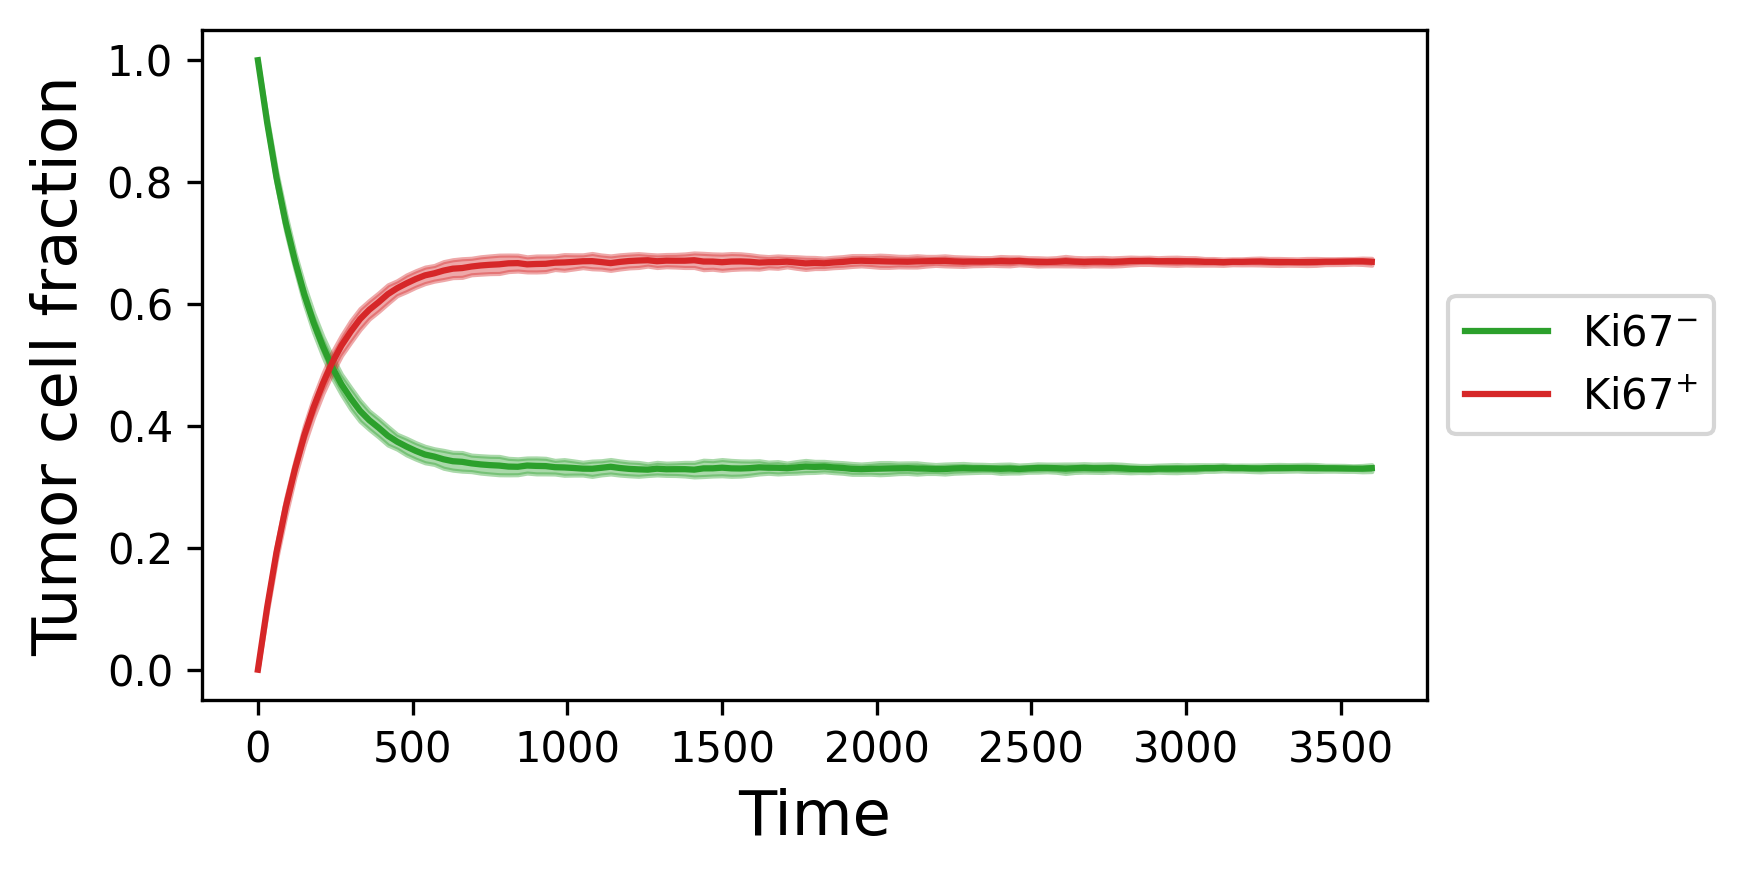

In [375]:
plot_dead = False

plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)

if plot_dead:
    if has_apop_nec:
        plt.plot( times, apoptotic_mean , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
        plt.plot( times, necrotic_mean , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

        plt.fill_between( times, apoptotic_mean-apoptotic_std, apoptotic_mean+apoptotic_std, color = "tab:blue", alpha = 0.4 );
        plt.fill_between( times, necrotic_mean-necrotic_std, necrotic_mean+necrotic_std, color = "tab:orange", alpha = 0.4 );
    else:
        plt.plot( times, dead_mean , '-', label='Dead', color='tab:blue', alpha=1.0 ); 
        
        plt.fill_between( times, dead_mean-dead_std, dead_mean+dead_std, color = "tab:blue", alpha = 0.4 );

if cycle_model == 0:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_premitotic_mean-Ki67_positive_premitotic_std, Ki67_positive_premitotic_mean+Ki67_positive_premitotic_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_postmitotic_mean-Ki67_positive_postmitotic_std, Ki67_positive_postmitotic_mean+Ki67_positive_postmitotic_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_mean-Ki67_positive_std, Ki67_positive_mean+Ki67_positive_std, color = "tab:red", alpha = 0.4 );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_mean , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2M_phase_mean-G2M_phase_std, G2M_phase_mean+G2M_phase_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 5:
    plt.plot( times, live_mean , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.fill_between( times, live_mean-live_std, live_mean+live_std, color = "tab:green", alpha = 0.4 );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_mean , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_mean , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2_phase_mean-G2_phase_std, G2_phase_mean+G2_phase_std, color = "tab:purple", alpha = 0.4 );
    plt.fill_between( times, M_phase_mean-M_phase_std, M_phase_mean+M_phase_std, color = "tab:brown", alpha = 0.4 );
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Temporal evolution of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig(os.path.join(output_folder, "stochastic_fraction.pdf"), bbox_inches = 'tight')

## Write a *.csv* output file

In [376]:
if cycle_model == 0:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_premitotic_mean.flatten(), Ki67_positive_postmitotic_mean.flatten(),
                                    apoptotic_mean.flatten(), necrotic_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_mean, Ki67_positive_premitotic_mean, Ki67_positive_postmitotic_mean, apoptotic_mean, necrotic_mean", comments='')
    else:
        output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_premitotic_mean.flatten(), Ki67_positive_postmitotic_mean.flatten(),
                                    dead_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_mean, Ki67_positive_premitotic_mean, Ki67_positive_postmitotic_mean, dead_mean", comments='')
elif cycle_model == 1:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_mean.flatten(), 
                                    apoptotic_mean.flatten(), necrotic_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_mean, Ki67_positive_mean, apoptotic_mean, necrotic_mean", comments='')
    else:
        output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_mean.flatten(), 
                                dead_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_mean, Ki67_positive_mean, dead_mean", comments='')
elif cycle_model == 2:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2M_phase_mean.flatten(),
                                    apoptotic_mean.flatten(), necrotic_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_mean, S_phase_mean, G2M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
    else:
        output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2M_phase_mean.flatten(),
                                    dead_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_mean, S_phase_mean, G2M_phase_mean, dead_mean", comments='')
elif cycle_model == 5:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), live_mean.flatten(), 
                                    apoptotic_mean.flatten(), necrotic_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, live_mean, apoptotic_mean, necrotic_mean", comments='')
    else:
        output_array = np.column_stack((times.flatten(), live_mean.flatten(), 
                                dead_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, live_mean, dead_mean", comments='')
elif cycle_model == 6:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2_phase_mean.flatten(), M_phase_mean.flatten(),
                                    apoptotic_mean.flatten(), necrotic_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_mean, S_phase_mean, G2_phase_mean, M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
    else:
        output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2_phase_mean.flatten(), M_phase_mean.flatten(),
                                    dead_mean.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_mean, S_phase_mean, G2_phase_mean, M_phase_mean, dead_mean", comments='')
else:
    print("Unrecognized cell cycle model.")

In [377]:
if cycle_model == 0:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_premitotic_std.flatten(), Ki67_positive_postmitotic_std.flatten(),
                                    apoptotic_std.flatten(), necrotic_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_std, Ki67_positive_premitotic_std, Ki67_positive_postmitotic_std, apoptotic_std, necrotic_std", comments='')
    else:
        output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_premitotic_std.flatten(), Ki67_positive_postmitotic_std.flatten(),
                                dead_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_std, Ki67_positive_premitotic_std, Ki67_positive_postmitotic_std, dead_std", comments='')
elif cycle_model == 1:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_std.flatten(), 
                                    apoptotic_std.flatten(), necrotic_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_std, Ki67_positive_std, apoptotic_std, necrotic_std", comments='')
    else:
        output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_std.flatten(), 
                                dead_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, Ki67_negative_std, Ki67_positive_std, dead_std", comments='')
elif cycle_model == 2:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2M_phase_std.flatten(),
                                    apoptotic_std.flatten(), necrotic_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_std, S_phase_std, G2M_phase_std, apoptotic_std, necrotic_std", comments='')
    else:
        output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2M_phase_std.flatten(),
                                dead_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_std, S_phase_std, G2M_phase_std, dead_std", comments='')
elif cycle_model == 5:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), live_std.flatten(), 
                                    apoptotic_std.flatten(), necrotic_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, live_std, apoptotic_std, necrotic_std", comments='')
    else:
        output_array = np.column_stack((times.flatten(), live_std.flatten(), 
                                dead_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, live_std, dead_std", comments='')
elif cycle_model == 6:
    if has_apop_nec:
        output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2_phase_std.flatten(), M_phase_std.flatten(),
                                    apoptotic_std.flatten(), necrotic_std.flatten()))
        np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
                   header="times, G0G1_phase_std, S_phase_std, G2_phase_std, M_phase_std, apoptotic_std, necrotic_std", comments='')
    else:
        output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2_phase_std.flatten(), M_phase_std.flatten(),
                                dead_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_fraction_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_std, S_phase_std, G2_phase_std, M_phase_std, dead_std", comments='')
else:
    print("Unrecognized cell cycle model.")

## Check convergence of the tumor cell fraction

In [378]:
def compare_to_mean(tumor_cell_fraction, label, tol = 1.5e-2):
    conv_time = -1
    for i in range(tumor_cell_fraction.size-1, -1, -1):
        mean = np.mean(tumor_cell_fraction[i:])
        if abs(mean - tumor_cell_fraction[i]) > tol:
            conv_time = times[i] + 1
            print(label + " fraction converged at t=" + str(conv_time) + " min")
            break
    if conv_time == -1:
        print(label + " fraction did not converge")
        
    return conv_time

In [379]:
if has_apop_nec:
    apoptotic_conv_time = compare_to_mean(apoptotic_mean, 'Apoptotic');
    necrotic_conv_time = compare_to_mean(necrotic_mean, 'Necrotic');
else:
    dead_conv_time = compare_to_mean(dead_mean, 'Dead');
    
if cycle_model == 0:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_conv_time = compare_to_mean(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_conv_time = compare_to_mean(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_conv_time = compare_to_mean(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_mean, 'S');
    G2M_phase_conv_time = compare_to_mean(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_conv_time = compare_to_mean(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_mean, 'S');
    G2_phase_conv_time = compare_to_mean(G2_phase_mean, 'G2');
    M_phase_conv_time = compare_to_mean(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

Dead fraction did not converge
Ki67$^{-}$ fraction converged at t=571.0 min
Ki67$^{+}$ fraction converged at t=571.0 min


## Plot convergence of the tumor cell fraction

<Figure size 432x288 with 0 Axes>

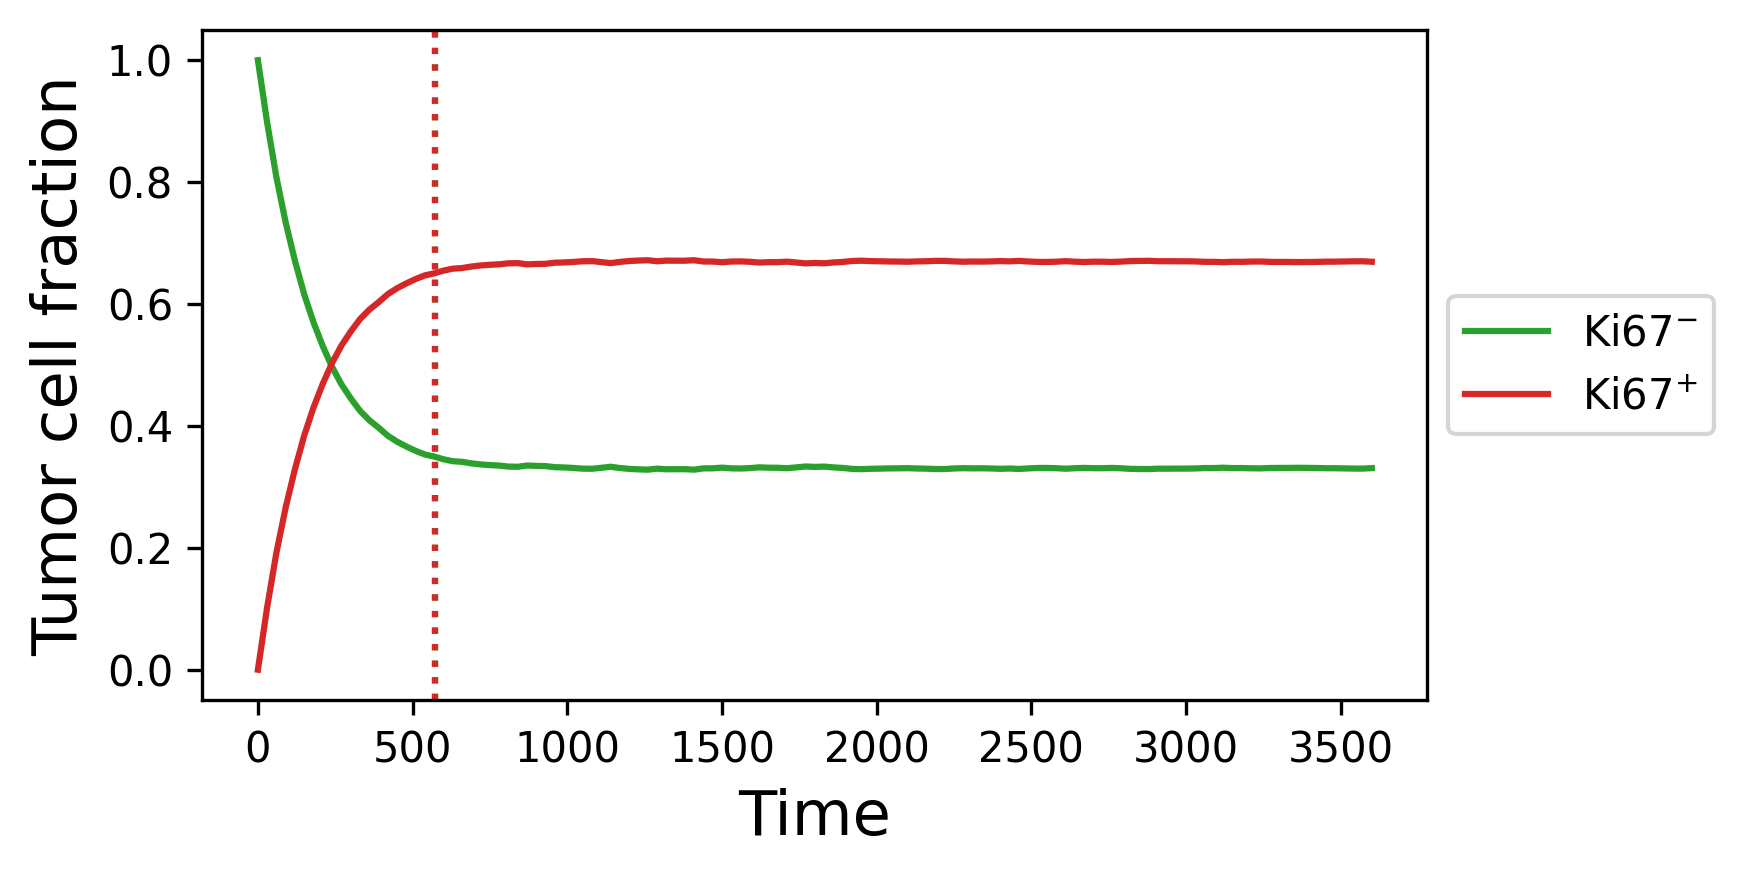

In [380]:
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)

if plot_dead:
    if has_apop_nec:
        plt.plot( times, apoptotic_mean , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
        plt.plot( times, necrotic_mean , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
        if apoptotic_conv_time != -1:
            plt.axvline(apoptotic_conv_time, color='tab:blue', linestyle=':')
        if necrotic_conv_time != -1:
            plt.axvline(necrotic_conv_time, color='tab:orange', linestyle=':')
    else:
        plt.plot( times, dead_mean , '-', label='Dead', color='tab:blue', alpha=1.0 ); 
        if dead_conv_time != -1:
            plt.axvline(dead_conv_time, color='tab:blue', linestyle=':')

if cycle_model == 0:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );

    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:green', linestyle=':')
    if Ki67_positive_premitotic_conv_time != -1:
        plt.axvline(Ki67_positive_premitotic_conv_time, color='tab:red', linestyle=':')
    if Ki67_positive_postmitotic_conv_time != -1:
        plt.axvline(Ki67_positive_postmitotic_conv_time, color='tab:purple', linestyle=':')
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:green', linestyle=':')
    if Ki67_positive_conv_time != -1:
        plt.axvline(Ki67_positive_conv_time, color='tab:red', linestyle=':')
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_mean , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:green', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:red', linestyle=':')
    if G2M_phase_conv_time != -1:
        plt.axvline(G2M_phase_conv_time, color='tab:purple', linestyle=':')
elif cycle_model == 5:
    plt.plot( times, live_mean , '-', label='Live', color='tab:green', alpha=1.0 );
    
    if live_conv_time != -1:
        plt.axvline(live_conv_time, color='tab:green', linestyle=':')
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_mean , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_mean , '-', label='M', color='tab:brown', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:green', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:red', linestyle=':')
    if G2_phase_conv_time != -1:
        plt.axvline(G2_phase_conv_time, color='tab:purple', linestyle=':')
    if M_phase_conv_time != -1:
        plt.axvline(M_phase_conv_time, color='tab:brown', linestyle=':')
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Convergence of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig(os.path.join(output_folder, "convergence_fraction.pdf"), bbox_inches = 'tight')

## Compute Geweke convergence diagnosis

In [381]:
max_perc_to_discard = 0.4
max_size_to_discard = round(max_perc_to_discard*times.size)

def geweke(tumor_cell_fraction, label, rate_a = 0.1, rate_b = 0.5):
    relative_distances = np.zeros((max_size_to_discard,))
    for i in range(max_size_to_discard):
        window = np.delete(tumor_cell_fraction, slice(i), 0)

        ka = round(rate_a*window.size)
        kb = round(rate_b*window.size)

        subseq_a = window[:ka]
        subseq_b = window[(window.size-kb):]

        mean_a = np.mean(subseq_a)
        mean_b = np.mean(subseq_b)
        mean_total = np.mean(window)

        relative_distances[i] = abs((mean_a - mean_b)/mean_total)
    
    return relative_distances

In [382]:
if plot_dead:
    if has_apop_nec:
        apoptotic_relative_distances = geweke(apoptotic_mean, 'Apoptotic');
        necrotic_relative_distances = geweke(necrotic_mean, 'Necrotic');
    else:
        dead_relative_distances = geweke(dead_mean, 'Dead');
    
if cycle_model == 0:
    Ki67_negative_relative_distances = geweke(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_relative_distances = geweke(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_relative_distances = geweke(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_relative_distances = geweke(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_relative_distances = geweke(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_relative_distances = geweke(G0G1_phase_mean, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_mean, 'S');
    G2M_phase_relative_distances = geweke(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_relative_distances = geweke(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_relative_distances = geweke(G0G1_phase_mean, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_mean, 'S');
    G2_phase_relative_distances = geweke(G2_phase_mean, 'G2');
    M_phase_relative_distances = geweke(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot Geweke convergence diagnosis

<Figure size 432x288 with 0 Axes>

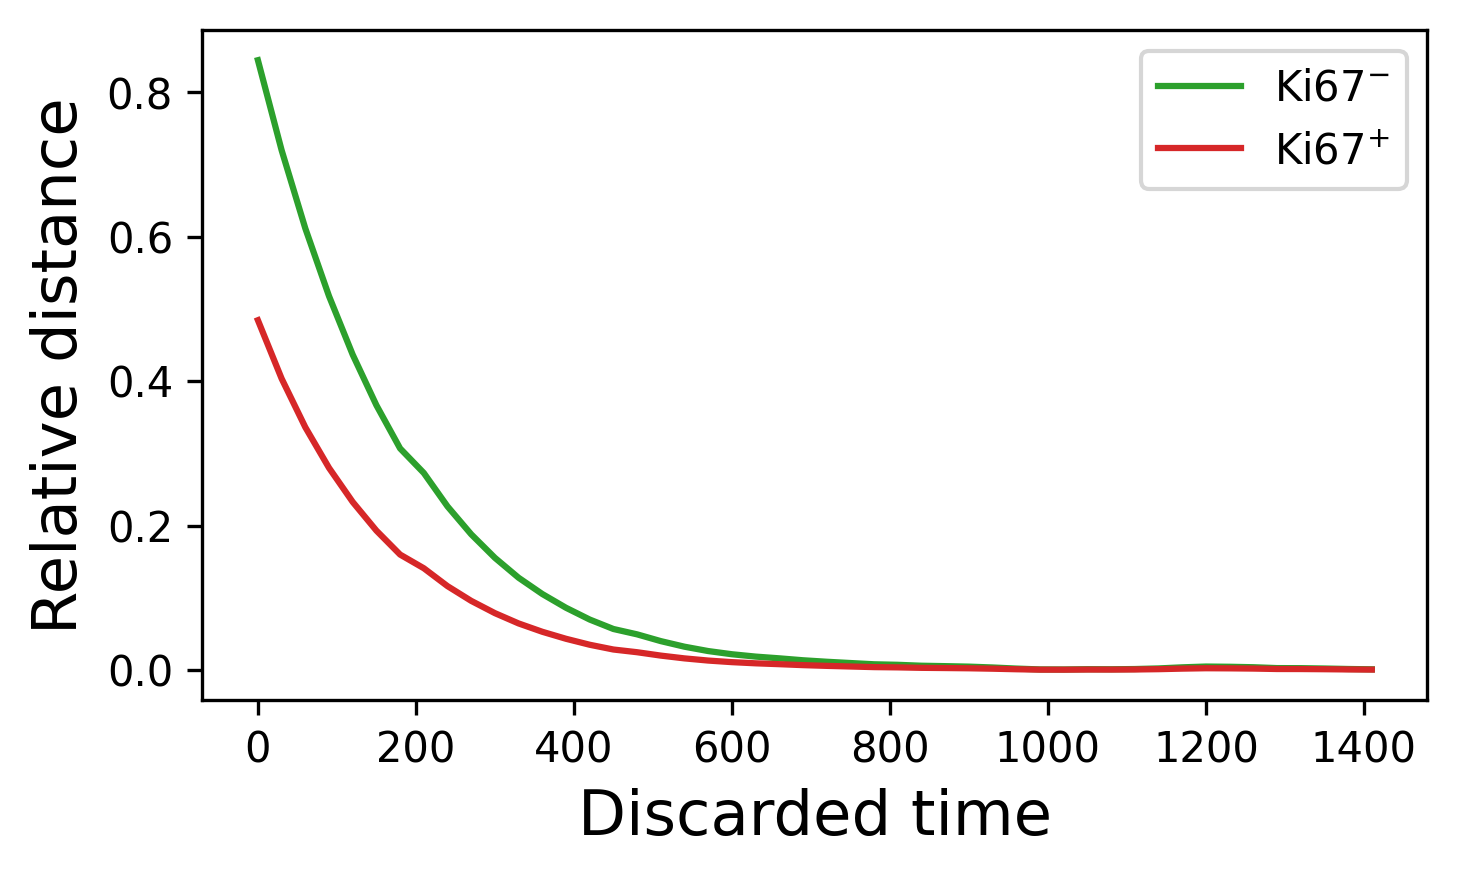

In [383]:
discarded_times = times[:max_size_to_discard]

plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)

if plot_dead:
    if has_apop_nec:
        plt.plot( discarded_times, apoptotic_relative_distances , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
        plt.plot( discarded_times, necrotic_relative_distances , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
    else:
        plt.plot( discarded_times, dead_relative_distances , '-', label='Dead', color='tab:blue', alpha=1.0 ); 
        
if cycle_model == 0:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_premitotic_relative_distances , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_postmitotic_relative_distances , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
elif cycle_model == 1:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_relative_distances , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
elif cycle_model == 2:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2M_phase_relative_distances , '-', label='G2/M', color='tab:purple', alpha=1.0 );
elif cycle_model == 5:
    plt.plot( discarded_times, live_relative_distances , '-', label='Live', color='tab:green', alpha=1.0 );
elif cycle_model == 6:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2_phase_relative_distances , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( discarded_times, M_phase_relative_distances , '-', label='M', color='tab:brown', alpha=1.0 );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

# plt.title( 'Geweke convergence diagnosis', size=20)
plt.xlabel( 'Discarded time', size=15 ) 
plt.ylabel( 'Relative distance', size=15 )
plt.savefig(os.path.join(output_folder, "geweke.pdf"), bbox_inches = 'tight')

## Compute ergodic means

In [384]:
def ergodic_mean(tumor_cell_fraction, label):
    ergodic_means = np.zeros((tumor_cell_fraction.size,))
    for i in range(tumor_cell_fraction.size):
        ergodic_means[i] = np.mean(tumor_cell_fraction[:(i+1)])
        
    return ergodic_means

In [385]:
if has_apop_nec:
    apoptotic_ergodic_means = ergodic_mean(apoptotic_mean, 'Apoptotic');
    necrotic_ergodic_means = ergodic_mean(necrotic_mean, 'Necrotic');
else:
    dead_ergodic_means = ergodic_mean(dead_mean, 'Dead');
    
if cycle_model == 0:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_premitotic_ergodic_means = ergodic_mean(Ki67_positive_premitotic_mean, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_ergodic_means = ergodic_mean(Ki67_positive_postmitotic_mean, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_mean, r'Ki67$^{-}$');
    Ki67_positive_ergodic_means = ergodic_mean(Ki67_positive_mean, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_mean, 'S');
    G2M_phase_ergodic_means = ergodic_mean(G2M_phase_mean, 'G2/M');
elif cycle_model == 5:
    live_ergodic_means = ergodic_mean(live_mean, 'Live');
elif cycle_model == 6:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_mean, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_mean, 'S');
    G2_phase_ergodic_means = ergodic_mean(G2_phase_mean, 'G2');
    M_phase_ergodic_means = ergodic_mean(M_phase_mean, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot ergodic means

<Figure size 432x288 with 0 Axes>

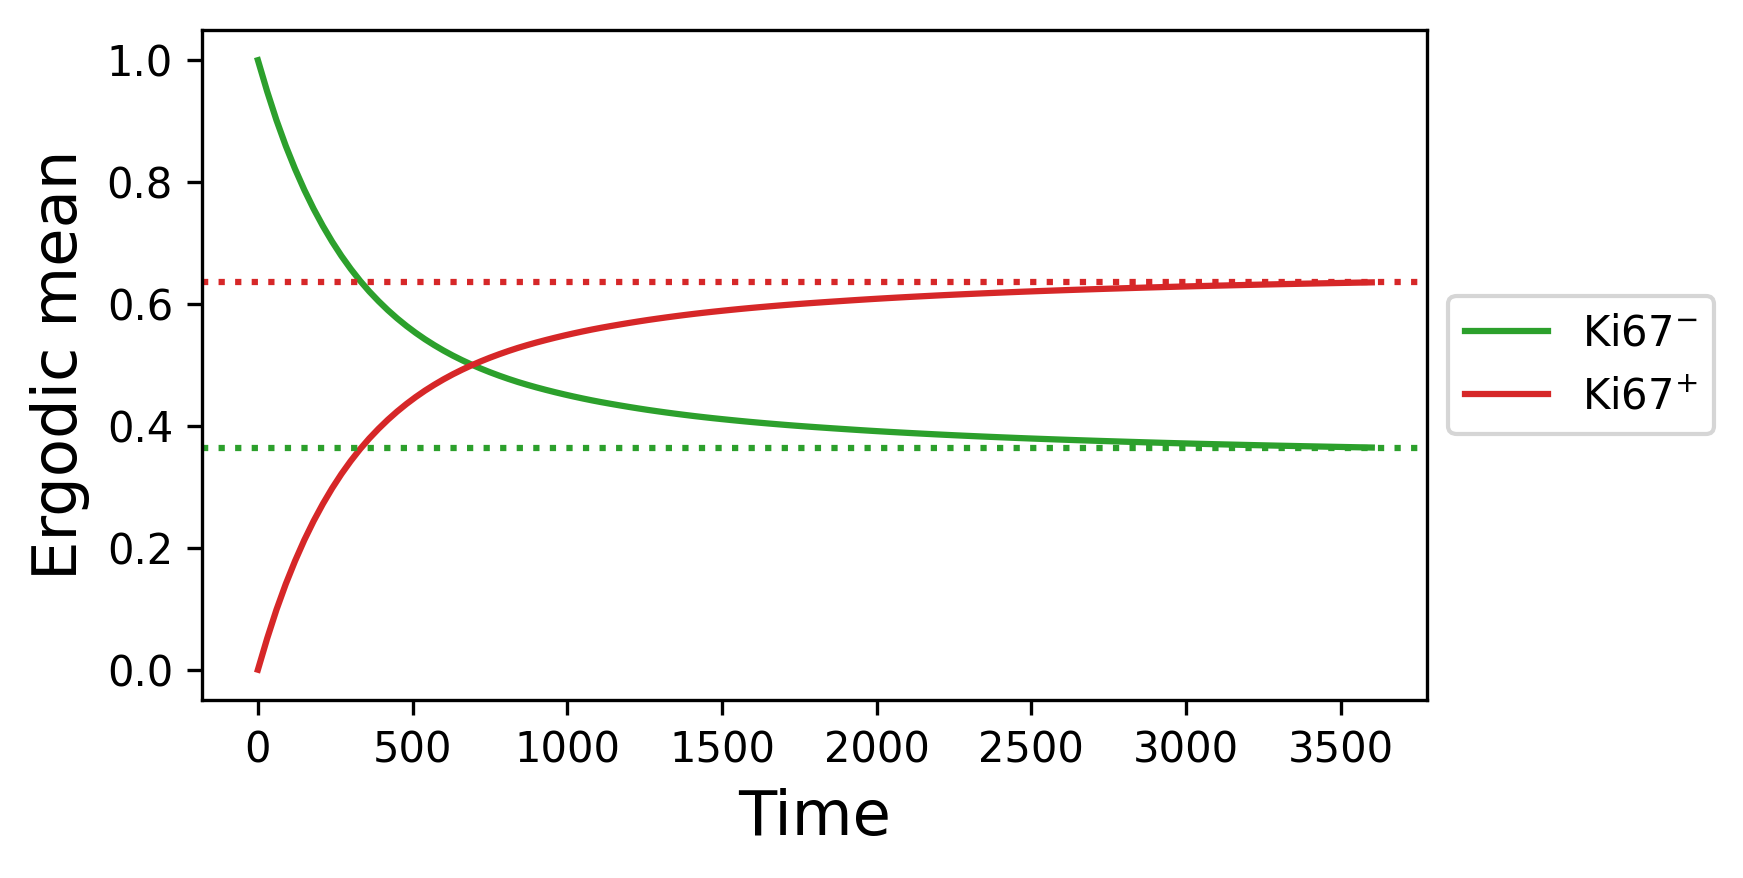

In [386]:
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)

if plot_dead:
    if has_apop_nec:
        plt.plot( times, apoptotic_ergodic_means , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
        plt.plot( times, necrotic_ergodic_means , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

        plt.axhline( np.mean(apoptotic_fraction), color='tab:blue', linestyle=':' );
        plt.axhline( np.mean(necrotic_fraction), color='tab:orange', linestyle=':' );
    else:
        plt.plot( times, dead_ergodic_means , '-', label='Dead', color='tab:blue', alpha=1.0 ); 
        
        plt.axhline( np.mean(dead_fraction), color='tab:blue', linestyle=':' );
        
if cycle_model == 0:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_premitotic_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_postmitotic_fraction), color='tab:purple', linestyle=':' );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_ergodic_means , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_fraction), color='tab:red', linestyle=':' );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_ergodic_means , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(G2M_phase_fraction), color='tab:purple', linestyle=':' );
elif cycle_model == 5:
    plt.plot( times, live_ergodic_means , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.axhline( np.mean(live_fraction), color='tab:green', linestyle=':' );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_ergodic_means , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_ergodic_means , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:green', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:red', linestyle=':' );
    plt.axhline( np.mean(G2_phase_fraction), color='tab:purple', linestyle=':' );
    plt.axhline( np.mean(M_phase_fraction), color='tab:brown', linestyle=':' );
else:
    print("Unrecognized cell cycle model.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.title( 'Ergodic means', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Ergodic mean', size=15 )
plt.savefig(os.path.join(output_folder, "ergodic_mean.pdf"), bbox_inches = 'tight')